# Estonia Analysis
We wish to obtain insights into the easily available public free data about Estonia and its capital, Tallinn, to determine if there are geographical regions that support new small to medium businesses more than others.

### 1. Python environment and imports
Utils for plotting, getting tables from html pages, foursquare API.

In [1]:
import pandas as pd

!conda install -c conda-forge lxml --yes
import lxml


%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Matplotlib version:  3.1.1


In [2]:
import requests # library to handle requests
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed
Libraries imported.


In [3]:
CLIENT_ID = '---' # your Foursquare ID
CLIENT_SECRET = '---' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2RAYMEHZYTEBGVS5F53MVYWTJZXQFMEVJE1CMLB5W4IYWOJX
CLIENT_SECRET:FZO00HITJQXBWMG5YK0NU3G30FXOLXJLGJF5R3EO4HJIL4GH


### 2. Getting tables from the internet
Some tables are gathered from wikipedia.org, some from Estonia's online data platform https://e-estonia.com and kaggle datasets.

Summary of data gathered from Wikipedia:
* List of tallest buildings
* List of cities and towns
* Tables from the Tallinn article page

Summary of data gathered from Kaggle and e-estonia:
* List of companies
* Lunch offers

In [4]:
estonia_height = pd.read_html("https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Estonia")
estonia_height = estonia_height[0]
estonia_height.head()

Rank                        Name  Image Location            Height  Floors  \
0    1           St. Olaf's church    NaN  Tallinn  123.7 m (406 ft)     NaN   
1    2           Swissotel Tallinn    NaN  Tallinn    117 m (384 ft)    30.0   
2    3         Tornimäe Apartments    NaN  Tallinn    117 m (384 ft)    30.0   
3    4        St. Nicholas' Church    NaN  Tallinn    105 m (344 ft)     NaN   
4    5  Radisson Blu Hotel Tallinn    NaN  Tallinn  104.8 m (344 ft)    25.0   

   Year built              Notes Refs  
0        1549                NaN  NaN  
1        2007                NaN  NaN  
2        2006                NaN  NaN  
3        1515  Renovated in 1984  NaN  
4        2001                NaN  NaN

In [5]:
population_2018 = pd.read_html("https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Estonia")[1]
population_2018.head()

#          Town   Town rights  Population 2014[1]  Population 2018[2]  \
0  1.0       Tallinn          1248              411063              430805   
1  2.0         Tartu  13th century               98449               93715   
2  3.0         Narva          1345               59049               56103   
3  4.0        Pärnu*          1251               40005               39375   
4  5.0  Kohtla-Järve          1946               37198               34394   

  County (maakond)  
0            Harju  
1            Tartu  
2         Ida-Viru  
3            Pärnu  
4         Ida-Viru

In [6]:
other_lists_1 = pd.read_html("https://en.wikipedia.org/wiki/Tallinn")

In [7]:
temperatures = other_lists_1[2]
temperatures.head()

Climate data for Tallinn, Estonia (1981–2010)                              \
                                          Month           Jan           Feb   
0                           Record high °C (°F)     9.2(48.6)    10.2(50.4)   
1                          Average high °C (°F)    −1.0(30.2)    −1.6(29.1)   
2                            Daily mean °C (°F)    −3.3(26.1)    −4.3(24.3)   
3                           Average low °C (°F)    −5.9(21.4)    −7.1(19.2)   
4                            Record low °C (°F)  −31.4(−24.5)  −28.7(−19.7)   

                                                                              \
            Mar          Apr         May         Jun         Jul         Aug   
0    15.9(60.6)   27.2(81.0)  29.4(84.9)  30.7(87.3)  34.3(93.7)  34.2(93.6)   
1     2.3(36.1)    9.2(48.6)  15.3(59.5)  18.9(66.0)  21.9(71.4)  20.4(68.7)   
2    −1.0(30.2)    4.5(40.1)  10.1(50.2)  14.1(57.4)  17.2(63.0)  16.0(60.8)   
3    −4.1(24.6)    0.6(33.1)   5.2(41.4)   9.5(49.1)  12.7(54.9)  12.0(53.6)   
4  −24.5(−12.1)  −12.0(10.4)  −5.0(23.0)   0.0(32.0)   4.0(39.2)   2.4(36.3)   

                                                                     
          Sep          Oct          Nov           Dec          Year  
0  28.0(82.4)   21.8(71.2)   12.1(53.8)    10.7(51.3)    34.3(93.7)  
1  15.2(59.4)    9.5(49.1)    3.5(38.3)     0.4(32.7)     9.5(49.1)  
2  11.3(52.3)    6.5(43.7)    1.3(34.3)    −1.9(28.6)     5.9(42.6)  
3   7.6(45.7)    3.8(38.8)   −0.9(30.4)    −4.3(24.3)     2.4(36.3)  
4  −4.1(24.6)  −10.5(13.1)  −18.8(−1.8)  −24.3(−11.7)  −31.4(−24.5)

In [8]:
tallinn_pop_area = other_lists_1[3]
tallinn_pop_area.head()

District  Population(November 2017)[48]  \
0          1. Haabersti                          45339   
1  2. Kesklinn (centre)                          63406   
2          3. Kristiine                          33202   
3           4. Lasnamäe                         119542   
4           5. Mustamäe                          68211   

                 Area[49]             Density  
0   22.26 km2 (8.6 sq mi)   2 (5,275.3/sq mi)  
1  30.56 km2 (11.8 sq mi)   2 (5,373.7/sq mi)  
2    7.84 km2 (3.0 sq mi)  2 (10,968.5/sq mi)  
3  27.47 km2 (10.6 sq mi)  2 (11,270.9/sq mi)  
4    8.09 km2 (3.1 sq mi)  2 (21,837.5/sq mi)

In [9]:
tallinn_demographics = other_lists_1[4]
tallinn_demographics

0                          1      2
0   Largest ethnic groups[51]  Largest ethnic groups[51]    NaN
1                Ethnic group          Population (2017)      %
2                   Estonians                     226967  53.21
3                    Russians                     156915  36.78
4                Other, incl:                      33281   7.80
5                  Ukrainians                      12335   2.89
6                 Belarusians                       6211   1.43
7                       Finns                       2251   0.52
8                        Jews                       1478   0.34
9                      Tatars                       1027   0.24
10                Lithuanians                        929   0.21
11                      Poles                        788   0.18
12                   Latvians                        779   0.18
13                    Germans                        695   0.16
14                    Unknown                       9375   2.19

In [10]:
tallinn_pop_history = other_lists_1[5]
tallinn_pop_history.head()

Year  1372  1772   1816   1834   1851   1881   1897    1925    1959  \
0  Population  3250  6954  12000  15300  24000  45900  58800  119800  283071   

     1989    2000    2005    2010    2017    2018    2019  
0  478974  400378  401694  406703  426538  430805  434562

In [11]:
companies = pd.read_csv("companies2016-10-05.csv")
companies.head()

Unnamed: 0                   nimi  ariregistri_kood      kmkr_nr  \
0           0           001 group OÜ          12754230          NaN   
1           1  007 Autohaus osaühing          11694365  EE101335276   
2           2        013 Graphics OÜ          12624154  EE101701716   
3           3      013 investment OÜ          12937781          NaN   
4           4         01Arvutiabi OÜ          14112620          NaN   

  ettevotja_staatus ettevotja_staatus_tekstina  ettevotja_aadress  \
0                 R         Registrisse kantud                NaN   
1                 R         Registrisse kantud                NaN   
2                 R         Registrisse kantud                NaN   
3                 R         Registrisse kantud                NaN   
4                 R         Registrisse kantud                NaN   

  asukoht_ettevotja_aadressis  asukoha_ehak_kood asukoha_ehak_tekstina  \
0             Õismäe tee 78-9              176.0               Tallinn   
1               Fortuuna tn 1              795.0                 Tartu   
2              Sõstra tn 4-36              339.0               Tallinn   
3                Tartu mnt 18              298.0               Tallinn   
4                 Aru tn 19-5              614.0               Tallinn   

  indeks_ettevotja_aadressis  ads_adr_id  ads_ads_oid  \
0                      13513   2182337.0          NaN   
1                      50603    240120.0          NaN   
2                      10616   2130660.0          NaN   
3                      10115   2311081.0          NaN   
4                      10318   2283769.0          NaN   

   ads_normaliseeritud_taisaadress  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

                                  teabesysteemi_link  
0  https://ariregister.rik.ee/ettevotja.py?ark=12...  
1  https://ariregister.rik.ee/ettevotja.py?ark=11...  
2  https://ariregister.rik.ee/ettevotja.py?ark=12...  
3  https://ariregister.rik.ee/ettevotja.py?ark=12...  
4  https://ariregister.rik.ee/ettevotja.py?ark=14...

In [12]:
lunch_offers = pd.read_csv("lunch_offers.csv")
lunch_offers.head()

address     city        date  \
0  Narva maantee 7c, Tallinn  Tallinn  2017-12-22   
1  Narva maantee 7c, Tallinn  Tallinn  2017-12-22   
2  Narva maantee 7c, Tallinn  Tallinn  2017-12-22   
3      Pärnu mnt. 2, Tallinn  Tallinn  2017-12-22   
4      Pärnu mnt. 2, Tallinn  Tallinn  2017-12-22   

                          name                                   offer  \
0                      Kompass                  Küpsetatud kanakintsud   
1                      Kompass                                 Lasanje   
2                      Kompass                                    Borš   
3  Babulja kohvik-kokteilibaar  Täidetud baklažaan seente ja sealihaga   
4  Babulja kohvik-kokteilibaar                                Kalasupp   

   price_euro  
0         5.0  
1         5.0  
2         2.7  
3         5.2  
4         2.0

### 3. Tallest buildings in Tallinn
Tables have data about height and year built. Below we process the height column of the table, which will be kept as float values of the size in meters.

In [13]:
eh = estonia_height.copy()

In [14]:
eh_values = []
for i in eh.values:
    print(i)
    if i[3] == "Tallinn":
        eh_values.append(i)
print(eh_values)
for i in range(len(eh_values)):
    eh_values[i][4] = float(eh_values[i][4].split(' ')[0].rstrip(' m'))
    
eh = pd.DataFrame(eh_values, columns=eh.columns)
eh.head()

['1' "St. Olaf's church" nan 'Tallinn' '123.7\xa0m (406\xa0ft)' nan 1549
 nan nan]
['2' 'Swissotel Tallinn' nan 'Tallinn' '117\xa0m (384\xa0ft)' 30.0 2007
 nan nan]
['3' 'Tornimäe Apartments' nan 'Tallinn' '117\xa0m (384\xa0ft)' 30.0 2006
 nan nan]
['4' "St. Nicholas' Church" nan 'Tallinn' '105\xa0m (344\xa0ft)' nan 1515
 'Renovated in 1984' nan]
['5' 'Radisson Blu Hotel Tallinn' nan 'Tallinn' '104.8\xa0m (344\xa0ft)'
 25.0 2001 nan nan]
['6' 'SEB main building' nan 'Tallinn' '94\xa0m (308\xa0ft)' 24.0 1999 nan
 nan]
['7' 'Tigutorn\xa0[et]' nan 'Tartu' '89.92\xa0m (295\xa0ft)' 23.0 2008 nan
 nan]
['8' 'Radisson Blu Hotel Olympia\xa0[et]' nan 'Tallinn'
 '84\xa0m (276\xa0ft)' 28.0 1980 nan nan]
['9' 'City Plaza' nan 'Tallinn' '78\xa0m (256\xa0ft)' 23.0 2004 nan nan]
['10' 'Sokos Hotel Viru' nan 'Tallinn' '74\xa0m (243\xa0ft)' 23.0 1972 nan
 nan]
['11' 'Maakri Maja' nan 'Tallinn' '72\xa0m (236\xa0ft)' 20.0 2003 nan nan]
['12' 'Osten Tor' nan 'Tallinn' '55.6\xa0m (182\xa0ft)' 16.0 2006 nan

Rank                        Name  Image Location  Height  Floors  \
0    1           St. Olaf's church    NaN  Tallinn   123.7     NaN   
1    2           Swissotel Tallinn    NaN  Tallinn   117.0    30.0   
2    3         Tornimäe Apartments    NaN  Tallinn   117.0    30.0   
3    4        St. Nicholas' Church    NaN  Tallinn   105.0     NaN   
4    5  Radisson Blu Hotel Tallinn    NaN  Tallinn   104.8    25.0   

   Year built              Notes Refs  
0        1549                NaN  NaN  
1        2007                NaN  NaN  
2        2006                NaN  NaN  
3        1515  Renovated in 1984  NaN  
4        2001                NaN  NaN

In [15]:
ehy = eh.sort_values(by=['Year built'])[["Year built", "Name"]]

In [16]:
ehy

Year built                             Name
3         1515             St. Nicholas' Church
0         1549                St. Olaf's church
8         1972                 Sokos Hotel Viru
14        1977              Ministry of Finance
6         1980  Radisson Blu Hotel Olympia [et]
19        1982                      P. Pinna 19
18        1989               Kalevipoja põik 10
17        1991                  Sõpruse pst 222
20        1992                     J. Koorti 18
5         1999                SEB main building
15        2000               Postimees Building
4         2001       Radisson Blu Hotel Tallinn
9         2003                      Maakri Maja
16        2003                   Pirita tee 26f
7         2004                       City Plaza
11        2006                       Fahle Maja
2         2006              Tornimäe Apartments
10        2006                        Osten Tor
1         2007                Swissotel Tallinn
12        2009                      Nordea Maja
13        2016                     Novira Plaza

### 4. Plotting some data
To gain general understanding about the cities, we plot some data.

In [17]:
ydict = dict()
for k in ehy["Year built"].values:
    ydict[k] = 1 if k not in ydict else ydict[k] + 1
print(ydict.keys())
print(ydict.values())

dict_keys([1515, 1549, 1972, 1977, 1980, 1982, 1989, 1991, 1992, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2009, 2016])
dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1])


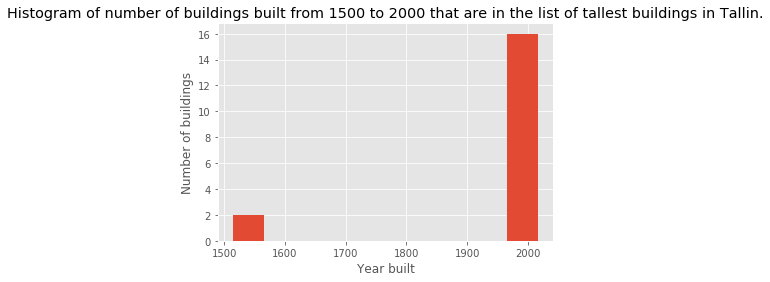

In [18]:
pd.DataFrame(list(zip(ydict.keys(), ydict.values())), columns=["Year built", "Count"])["Year built"].plot(kind='hist')
plt.title('Histogram of number of buildings built from 1500 to 2000 that are in the list of tallest buildings in Tallin.')
plt.ylabel('Number of buildings')
plt.xlabel('Year built')

plt.show()

Two buildings that are in the list of tallest have been built in the 16th century (St. Nicholas and St. Olaf's church), and they are in the top 3 tallest by height.

#### Now plotting from 1900 to 2020

In [19]:
ydict = dict()
for k in ehy["Year built"].values:
    if k < 1900 or k > 2020:
        continue
    else:
        ydict[k] = 1 if k not in ydict else ydict[k] + 1
print(ydict.keys())
print(ydict.values())

dict_keys([1972, 1977, 1980, 1982, 1989, 1991, 1992, 1999, 2000, 2001, 2003, 2004, 2006, 2007, 2009, 2016])
dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1])


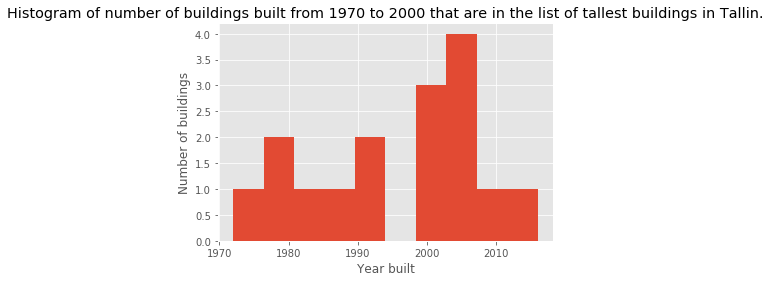

In [20]:
pd.DataFrame(list(zip(ydict.keys(), ydict.values())), columns=["Year built", "Count"])["Year built"].plot(kind='hist')
plt.title('Histogram of number of buildings built from 1970 to 2000 that are in the list of tallest buildings in Tallin.')
plt.ylabel('Number of buildings')
plt.xlabel('Year built')

plt.show()

Many of the recently built buildings in the top 10 tallest are residential & hotels.

# Districts and population
The table `tallinn_pop_area` has data about population per district of the capital of Estonia, Tallinn. Information about the area can also be processed to be stored in km^2 as floats. The density can be computed in O(n). 


TODO: Later we may use foursquare to get geographical data about the districts, such as longitude and latitude.

In [21]:
tallinn_pop_area

District  Population(November 2017)[48]  \
0          1. Haabersti                          45339   
1  2. Kesklinn (centre)                          63406   
2          3. Kristiine                          33202   
3           4. Lasnamäe                         119542   
4           5. Mustamäe                          68211   
5              6. Nõmme                          39540   
6             7. Pirita                          18606   
7      8. Põhja-Tallinn                          60203   

                 Area[49]             Density  
0   22.26 km2 (8.6 sq mi)   2 (5,275.3/sq mi)  
1  30.56 km2 (11.8 sq mi)   2 (5,373.7/sq mi)  
2    7.84 km2 (3.0 sq mi)  2 (10,968.5/sq mi)  
3  27.47 km2 (10.6 sq mi)  2 (11,270.9/sq mi)  
4    8.09 km2 (3.1 sq mi)  2 (21,837.5/sq mi)  
5  29.17 km2 (11.3 sq mi)   2 (3,510.7/sq mi)  
6   18.73 km2 (7.2 sq mi)   2 (2,572.8/sq mi)  
7    15.9 km2 (6.1 sq mi)   2 (9,806.6/sq mi)

In [22]:
tsa = tallinn_pop_area.sort_values(by=['Population(November 2017)[48]'], ascending=False)[["District", "Area[49]", "Population(November 2017)[48]"]].copy()

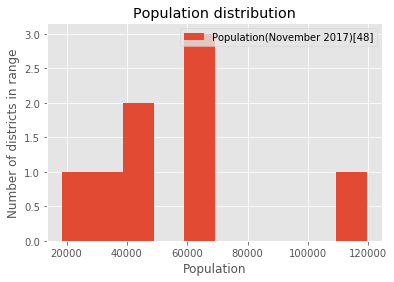

In [23]:
tsa[['Population(November 2017)[48]']].plot(kind='hist')

plt.title('Population distribution')
plt.ylabel('Number of districts in range')
plt.xlabel('Population')

plt.show()

#### Conclusion
This tells us that population is balanced between the districts of Tallinn, following a gaussian curve.

In [24]:
tallinn_pop_history.columns[1:]
tallinn_pop_history.values[0][1:]
tph_df = pd.DataFrame(list(zip(tallinn_pop_history.columns[1:], tallinn_pop_history.values[0][1:])), columns=["Year", "Population"])

In [25]:
tph_df

Year  Population
0   1372        3250
1   1772        6954
2   1816       12000
3   1834       15300
4   1851       24000
5   1881       45900
6   1897       58800
7   1925      119800
8   1959      283071
9   1989      478974
10  2000      400378
11  2005      401694
12  2010      406703
13  2017      426538
14  2018      430805
15  2019      434562

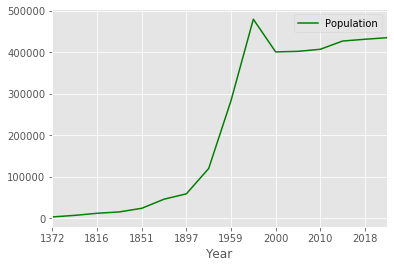

In [26]:
tph_df.plot(x='Year', y='Population', color='green')

#### Conclusion
Population growth stability since the year 2000 could be a sign that the population distribution will not suddenly change in an unpredictable way, and will keep a gaussian distribution. This may give investors an idea about the risk of investing in new small and medium businesses.

In [27]:
population_2018.head()

#          Town   Town rights  Population 2014[1]  Population 2018[2]  \
0  1.0       Tallinn          1248              411063              430805   
1  2.0         Tartu  13th century               98449               93715   
2  3.0         Narva          1345               59049               56103   
3  4.0        Pärnu*          1251               40005               39375   
4  5.0  Kohtla-Järve          1946               37198               34394   

  County (maakond)  
0            Harju  
1            Tartu  
2         Ida-Viru  
3            Pärnu  
4         Ida-Viru

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0714f33ac8>]],
      dtype=object)

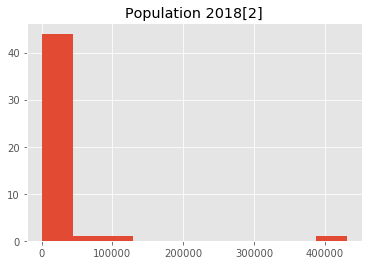

In [28]:
population_2018[["Population 2018[2]"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f071c7dab70>]],
      dtype=object)

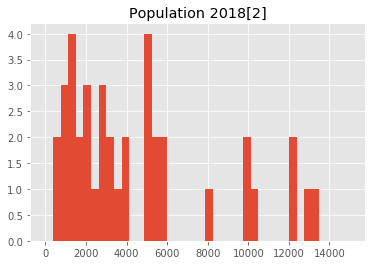

In [29]:
population_2018[["Population 2018[2]"]].hist(bins=40, range=(0,15000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0715048c50>]],
      dtype=object)

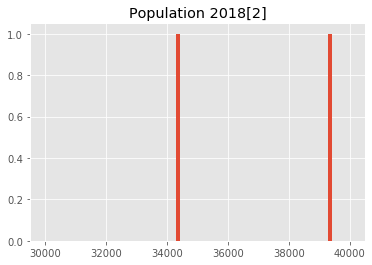

In [30]:
population_2018[["Population 2018[2]"]].hist(bins=70, range=(30000,40000))

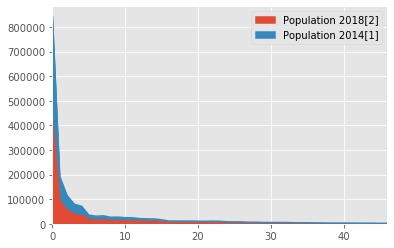

In [31]:
population_2018[["Population 2018[2]", "Population 2014[1]"]].plot(kind='area')

#### Conclusion
Most towns have a population between 0 and 6000. Approximately two towns/cities have a very large population, around 400.000, 600.000

The population has been decreasing since 2014.



# Foursquare mapping

We can map the tallest buildings to a Folium map.

In [32]:
ehy.head()

Year built                             Name
3         1515             St. Nicholas' Church
0         1549                St. Olaf's church
8         1972                 Sokos Hotel Viru
14        1977              Ministry of Finance
6         1980  Radisson Blu Hotel Olympia [et]

In [33]:
vecs = []
latitude_1 = 0.1
longitude_2 = 0.1
for i in ehy.values:
    addr_obj = i[1]
    addr_string = "{0}, Tallinn, EE".format(addr_obj)
    
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(addr_string)
    try:
        latitude = location.latitude
        longitude = location.longitude
        
        latitude_1 = latitude
        longitude_2 = longitude
    except:
        continue

    vecs.append([addr_obj, latitude, longitude])

vdf = pd.DataFrame(vecs, columns=["Building", "Latitude", "Longitude"])

In [34]:
vdf

Building   Latitude  Longitude
0         St. Nicholas' Church  59.435918  24.742784
1            St. Olaf's church  59.441320  24.747903
2             Sokos Hotel Viru  59.436599  24.754917
3                  P. Pinna 19  59.434680  24.834839
4           Kalevipoja põik 10  59.439002  24.831388
5              Sõpruse pst 222  59.400939  24.693141
6   Radisson Blu Hotel Tallinn  59.433431  24.757758
7               Pirita tee 26f  59.460082  24.817073
8                   City Plaza  59.434696  24.758412
9            Swissotel Tallinn  59.432868  24.761484
10                Novira Plaza  59.433480  24.763133

In [35]:
print(latitude_1, longitude_2)
buildings_map = folium.Map(location=[latitude_1, longitude_2], zoom_start=12) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
for i in vdf.values:
    folium.features.CircleMarker(
        [i[1], i[2]],
        radius=10,
        color='green',
        #popup=i[0],
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(buildings_map)
buildings_map

59.43348025 24.7631327133484


#### Conclusion
The tallest buildings are mostly in the center of Tallinn.

In [36]:
tallinn_pop_area.head()

District  Population(November 2017)[48]  \
0          1. Haabersti                          45339   
1  2. Kesklinn (centre)                          63406   
2          3. Kristiine                          33202   
3           4. Lasnamäe                         119542   
4           5. Mustamäe                          68211   

                 Area[49]             Density  
0   22.26 km2 (8.6 sq mi)   2 (5,275.3/sq mi)  
1  30.56 km2 (11.8 sq mi)   2 (5,373.7/sq mi)  
2    7.84 km2 (3.0 sq mi)  2 (10,968.5/sq mi)  
3  27.47 km2 (10.6 sq mi)  2 (11,270.9/sq mi)  
4    8.09 km2 (3.1 sq mi)  2 (21,837.5/sq mi)

In [37]:
tpdf = tallinn_pop_area.copy()

In [38]:
vecs = []
for i in tpdf["District"].values:
    vals = i.split(' ')[1:]
    strjoin = ""
    for j in vals:
        strjoin += ' ' + j
    print(strjoin)
    
    addr_obj = strjoin.lstrip(' ')
    addr_string = "{0}, Tallinn, EE".format(addr_obj)
    
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(addr_string)
    try:
        latitude = location.latitude
        longitude = location.longitude
        
        latitude_1 = latitude
        longitude_2 = longitude
    except:
        continue

    vecs.append([addr_obj, latitude, longitude])

 Haabersti
 Kesklinn (centre)
 Kristiine
 Lasnamäe
 Mustamäe
 Nõmme
 Pirita
 Põhja-Tallinn


In [39]:
vdfn = pd.DataFrame(vecs, columns=["District", "Latitude", "Longitude"])

In [40]:
vdfn

District   Latitude  Longitude
0          Haabersti  59.425308  24.649147
1  Kesklinn (centre)  59.416042  24.765145
2          Kristiine  59.413835  24.712461
3           Lasnamäe  59.434807  24.859609
4           Mustamäe  59.404865  24.676793
5              Nõmme  59.384847  24.687493
6             Pirita  59.469875  24.838251
7      Põhja-Tallinn  59.458014  24.683528

In [41]:
latitude_1 = vdfn["Latitude"].values[0]
longitude_2 = vdfn["Longitude"].values[0]
buildings_map = folium.Map(location=[latitude_1, longitude_2], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
for i in vdfn.values:
    folium.features.CircleMarker(
        [i[1], i[2]],
        radius=10,
        color='green',
        popup=i[0],
        parse_html = True,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(buildings_map)
buildings_map

#### Conclusion
The districts of Tallinn have been mapped. Judging by the last two maps, the central district Kesklinn and the eastern district Lasnamäe are the most developed and probably expensive ones. One airport is also found between these two, which can mean the presence of tourists.

Having a look at the demographics, Russians, Ukraninas, Belarussians and Finns are the most likely tourists to be found.

In [42]:
tallinn_pop_area.head()

District  Population(November 2017)[48]  \
0          1. Haabersti                          45339   
1  2. Kesklinn (centre)                          63406   
2          3. Kristiine                          33202   
3           4. Lasnamäe                         119542   
4           5. Mustamäe                          68211   

                 Area[49]             Density  
0   22.26 km2 (8.6 sq mi)   2 (5,275.3/sq mi)  
1  30.56 km2 (11.8 sq mi)   2 (5,373.7/sq mi)  
2    7.84 km2 (3.0 sq mi)  2 (10,968.5/sq mi)  
3  27.47 km2 (10.6 sq mi)  2 (11,270.9/sq mi)  
4    8.09 km2 (3.1 sq mi)  2 (21,837.5/sq mi)

In [43]:
tallinn_pop_area.sort_values(by='Population(November 2017)[48]', ascending=False)

District  Population(November 2017)[48]  \
3           4. Lasnamäe                         119542   
4           5. Mustamäe                          68211   
1  2. Kesklinn (centre)                          63406   
7      8. Põhja-Tallinn                          60203   
0          1. Haabersti                          45339   
5              6. Nõmme                          39540   
2          3. Kristiine                          33202   
6             7. Pirita                          18606   

                 Area[49]             Density  
3  27.47 km2 (10.6 sq mi)  2 (11,270.9/sq mi)  
4    8.09 km2 (3.1 sq mi)  2 (21,837.5/sq mi)  
1  30.56 km2 (11.8 sq mi)   2 (5,373.7/sq mi)  
7    15.9 km2 (6.1 sq mi)   2 (9,806.6/sq mi)  
0   22.26 km2 (8.6 sq mi)   2 (5,275.3/sq mi)  
5  29.17 km2 (11.3 sq mi)   2 (3,510.7/sq mi)  
2    7.84 km2 (3.0 sq mi)  2 (10,968.5/sq mi)  
6   18.73 km2 (7.2 sq mi)   2 (2,572.8/sq mi)

Mustamäe seems to have the second largest population, however it is far away from the other two largest by population, far away from the central district with the largest number of high density tallest buildings, far away from the airport, therefore it may be a potential candidate for opening new small to medium businesses like restaurants and coffee shops.

Põhja-Tallinn is excluded because of its proximity to a port, and the rest have a difference of 15000-20000 population, therefore are not the densest, and would fall in the category of medium density to low density businesses.

#### More analysis of districts
Next we try to find an industrial district from the companies data, and go through the lunch_offers data.

In [44]:
vecs = []
latitude_1 = 1.1
longitude_2 = 1.1

sdf = lunch_offers.sort_values(by='price_euro', ascending=False)

uniquevecs = dict()

for i in sdf.values[1:110]:
    address = i[0]
    if address in uniquevecs.keys():
        uniquevecs[address] = 1
        continue
    qds = "{0}, Tallinn, EE".format(address)
    print(qds)
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(qds)
    try:
        latitude = location.latitude
        longitude = location.longitude
        
        latitude_1 = latitude
        longitude_2 = longitude
    except:
        continue
    
    if address in uniquevecs.keys():
        pass
    else:
        vecs.append([address, latitude, longitude])
    uniquevecs[address] = 1


Väike-Karja 5, Tallinn, Tallinn, EE
Pärnu mnt. 37, Tallinn, Tallinn, EE
Sakala 3, Tallinn, Tallinn, EE
Pepleri 14, Tartu, Tallinn, EE
Roseni 8, Tallinn, Tallinn, EE
Jakobi 29, Tallinn, Tallinn, EE
P.Pinna 8, Tallinn, Tallinn, EE
Vesivärava 37, Tallinn, Tallinn, EE
Vilde tee 128, Tallinn, Tallinn, EE
A. H. Tammsaare tee 104a, Tallinn, Tallinn, EE
Haabersti 1, Tallinn, Tallinn, EE
Pärnu maantee 238, Tallinn, Tallinn, EE
Pae 68, Tallinn, Tallinn, EE
Ringtee 75, Tartu, Tallinn, EE
Ringtee 75, Tartu, Tallinn, EE
Ringtee 75, Tartu, Tallinn, EE
Ringtee 75, Tartu, Tallinn, EE
Ringtee 75, Tartu, Tallinn, EE


In [45]:
vecs
vdfn = pd.DataFrame(vecs, columns=["Address", "Latitude", "Longitude"])

In [46]:
buildings_map = folium.Map(location=[latitude_1, longitude_2], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
for i in vdfn.values:
    folium.features.CircleMarker(
        [i[1], i[2]],
        radius=10,
        color='green',
        popup=i[0],
        parse_html = True,
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.6
    ).add_to(buildings_map)
buildings_map

In [47]:
for i in companies[["nimi", "asukoha_ehak_tekstina", "asukoht_ettevotja_aadressis"]].values[:100]:
    if i[1] == "Tallinn":
        print(i)

['001 group OÜ' 'Tallinn' 'Õismäe tee 78-9']
['013 Graphics OÜ' 'Tallinn' 'Sõstra tn 4-36']
['013 investment OÜ' 'Tallinn' 'Tartu mnt 18']
['01Arvutiabi OÜ' 'Tallinn' 'Aru tn 19-5']
['01 Creations Osaühing' 'Tallinn' 'Ahtri tn 12']
['0-Takso OÜ' 'Tallinn' 'Liivalaia tn 7-29']
['1000 Extra OÜ' 'Tallinn' 'Roosikrantsi tn 2-K226']
['1001 Investments OÜ' 'Tallinn' 'Luha tn 20-29']
['100% Carbon OÜ' 'Tallinn' 'Roo tn 42-7']
['100CAR OÜ' 'Tallinn' 'Kadaka tee 137-72']
['100m³ Täiteliiva UÜ' 'Tallinn' 'Tornimäe tn 5']
['100 Protsenti OÜ' 'Tallinn' 'Vesivärava tn 46-6']
['100 Vill OÜ' 'Tallinn' 'K. Kärberi tn 34a']
['100 Wool OÜ' 'Tallinn' 'K. Kärberi tn 34-45']
['101 Dream OÜ' 'Tallinn' 'Marati tn 4-7']
['101km OÜ' 'Tallinn' 'Sepapaja tn 6']
['101 Ärisüsteemid OÜ' 'Tallinn' 'Pärnu mnt 139']
['1024 OÜ' 'Tallinn' 'Pae tn 25-2']
['102 Property Holding OÜ' 'Tallinn' 'Sakala tn 22-4']
['10 Capital OÜ' 'Tallinn' 'Väike-Ameerika tn 8']
['10 Distribution Group OÜ' 'Tallinn' 'Roosikrantsi tn 2-K248']


#### Final remarks
The data presented so far is enough to make an idea. Due to the limit of free API calls, the analysis was not performed to the full extent. The districts that could best support new small to medium businesses, by the criteria presented, are Haabersti, Nõmme, Kristiine.

An extra step could be to map all businesses and see correlations between residential surface and industrial/business surface.